In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Fraud_check.csv')
data.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [3]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
data.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
Undergrad          600 non-null object
Marital.Status     600 non-null object
Taxable.Income     600 non-null int64
City.Population    600 non-null int64
Work.Experience    600 non-null int64
Urban              600 non-null object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
# data.Undergrad[data.Undergrad == 'NO'] = 0
# data.Undergrad[data.Undergrad == 'YES'] = 1

In [7]:
#pd.get_dummies(data=data, columns=[data.Undergrad, data.Urban])

In [8]:
data['Undergrad'] = data['Undergrad'].map({'YES':1,'NO':0})
data['Marital.Status'] = data['Marital.Status'].map({'Single':1, 'Divorced':0, 'Married':2})
data['Urban'] = data['Urban'].map({'YES':1, 'NO':0})

In [9]:
data.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,1,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,2,36925,160205,30,1
3,1,1,50190,193264,15,1
4,0,2,81002,27533,28,0
5,0,0,33329,116382,0,0
6,0,0,83357,80890,8,1
7,1,1,62774,131253,3,1
8,0,1,83519,102481,12,1
9,1,0,98152,155482,4,1


In [10]:
data['Category'] = np.where(data['Taxable.Income'].values >= 30000, '1', '0') #Good:1, Risky:0

In [11]:
data.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Category
0,0,1,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,2,36925,160205,30,1,1
3,1,1,50190,193264,15,1,1
4,0,2,81002,27533,28,0,1
5,0,0,33329,116382,0,0,1
6,0,0,83357,80890,8,1,1
7,1,1,62774,131253,3,1,1
8,0,1,83519,102481,12,1,1
9,1,0,98152,155482,4,1,1


In [12]:
colnames = list(data.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Category']

In [13]:
X = colnames[:-1]
Y = colnames[-1]

In [25]:
Y

'Category'

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train,test = train_test_split(data,test_size=0.2)

In [17]:
from sklearn.tree import DecisionTreeClassifier as DT

In [26]:
model = DT(criterion='entropy')
clf = model.fit(train[X],train[Y])

In [27]:
pred = model.predict(test[X])

In [28]:
pred

array(['1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1',
       '1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1',
       '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0',
       '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1',
       '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1',
       '1', '1', '1'], dtype=object)

In [29]:
pd.Series(pred).value_counts()

1    101
0     19
dtype: int64

In [30]:
pd.crosstab(test[Y],pred)

col_0,0,1
Category,,
0,18,0
1,1,101


In [31]:
from sklearn import tree

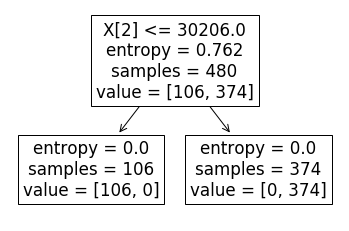

In [32]:
tree.plot_tree(clf)
plt.show()